# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Reynaldi Tangkearung
- **Email:** reynaldi.fcb@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/reynaldi_tangkearung/

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata jumlah penyewaan sepeda yang terjadi pada tahun 2011-2012?
- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda pada pengguna casual dan registered?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membuat tabel penyewaan per jam.

In [2]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/reynalditangkearung/submission/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Membuat tabel penyewaan per hari.

In [3]:
day_df = pd.read_csv("https://raw.githubusercontent.com/reynalditangkearung/submission/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data Hour.

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


dari informasi diatas, terdapat kesalahan tipe data pada kolom **dteday**. kolom ini seharusnya bertipe data **datetime** dalam format tanggal.

In [5]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari informasi diatas, Tidak ditemukan missing value pada data hour_df.



In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Assessing Data Day.

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


dari informasi diatas, terdapat kesalahan tipe data pada kolom **dteday**. kolom ini seharusnya bertipe data **datetime** dalam format tanggal.

In [9]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari informasi diatas, tidak ditemukan missing value pada data day_df.

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [12]:
# mengganti tipe data kolom "dteday" menjadi datetime.

day_dteday_columns = ["dteday"]

for columns in day_dteday_columns:
  day_df[columns] = pd.to_datetime(day_df[columns])

In [13]:
days = day_df.info()
print(days)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
# mengganti tipe data kolom "dteday" menjadi datetime.

hour_dteday_columns = ["dteday"]

for columns in hour_dteday_columns:
  hour_df[columns] = pd.to_datetime(day_df[columns])

In [15]:
hours = hour_df.info()
print(hours)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [16]:
# Melakukan rename nama kolom pada hour_df agar mudah dipahami ketika proses data visualization.

hour_df.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "weathersit": "weather",
    "cnt": "count"
}, inplace=True)

hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
# Melakukan rename nama kolom pada hour_df agar mudah dipahami ketika proses data visualization.

day_df.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "weathersit": "weather",
    "cnt": "count"
}, inplace=True)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
# Mengubah keterangan angka menjadi string pada hour_df

hour_df["season"] = hour_df["season"].map({
    1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"
})

# Mengubah keterangan angka menjadi string pada day_df

day_df["season"] = day_df["season"].map({
    1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"
})

## Exploratory Data Analysis (EDA)

### Explorasi Data day_df dan hour_df

In [19]:
day_df.describe(include="all")

<ipython-input-19-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [20]:
hour_df.describe(include="all")

<ipython-input-20-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,731,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,4496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Mengelompokkan data penyewaan sepeda berdasarkan bulan dan tahun.

In [21]:
day_df.groupby(by=["month", "year"]).agg({
    "instant": "nunique",
    "count": ["min", "max", "mean"]
})

instant count                   
           nunique   min   max         mean
month year                                 
1     0         31   431  1985  1231.903226
      1         31  1301  4521  3120.774194
2     0         28  1005  2927  1721.964286
      1         29  1529  5062  3556.448276
3     0         31   605  3239  2065.967742
      1         31  3194  8362  5318.548387
4     0         30   795  5312  3162.333333
      1         30  1027  7460  5807.466667
5     0         31  2633  5805  4381.322581
      1         31  2843  8294  6318.225806
6     0         30  3767  5515  4783.733333
      1         30  4127  8120  6761.000000
7     0         31  3285  6043  4559.387097
      1         31  4459  8173  6567.967742
8     0         31  1115  5895  4409.387097
      1         31  4549  7865  6919.451613
9     0         30  1842  5423  4247.266667
      1         30  4073  8714  7285.766667
10    0         31   627  5511  3984.225806
      1         31    22  8156  6414.225806
11    0         30  1495  4486  3405.566667
      1         30  2277  6852  5088.800000
12    0         31   705  3940  2816.870968
      1         31   441  6606  3990.741935

Mengelompokkan pengguna casual dan registered berdasarkan season pada hour_df dan day_df.

In [22]:
hour_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": "mean",
    "registered": "mean",
    "count": ["max", "min", "mean"]
})

instant     casual  registered count                
         nunique       mean        mean   max min        mean
season                                                       
Fall        4496  50.287144  185.729093   977   1  236.016237
Springer    4242  14.290901   96.823668   801   1  111.114569
Summer      4409  46.160581  162.183488   957   1  208.344069
Winter      4232  30.666824  168.202032   967   1  198.868856

In [23]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": "mean",
    "registered": "mean",
    "count": ["max", "min", "mean"]
})

instant       casual   registered count                   
         nunique         mean         mean   max   min         mean
season                                                             
Fall         188  1202.611702  4441.691489  8714  1115  5644.303191
Springer     181   334.928177  2269.204420  7836   431  2604.132597
Summer       184  1106.097826  3886.233696  8362   795  4992.331522
Winter       178   729.112360  3999.050562  8555    22  4728.162921

Mengelompokkan pengguna casual dan registered berdasarkan weekday pada hour_df dan day_df.

In [24]:
hour_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": "mean",
    "registered": "mean",
    "count": ["max", "min", "mean"]
})

instant     casual  registered count                
        nunique       mean        mean   max min        mean
weekday                                                     
0          2502  56.163469  121.305356   776   1  177.468825
1          2479  28.553449  155.191206   968   1  183.744655
2          2453  23.580514  167.658377   970   1  191.238891
3          2475  23.159192  167.971313   977   1  191.130505
4          2471  24.872521  171.564144   976   1  196.436665
5          2487  31.458786  164.677121   957   1  196.135907
6          2512  61.246815  128.962978   783   1  190.209793

In [25]:
day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": "mean",
    "registered": "mean",
    "count": ["max", "min", "mean"]
})

instant       casual   registered count                   
        nunique         mean         mean   max   min         mean
weekday                                                           
0           105  1338.295238  2890.533333  8227   605  4228.828571
1           105   674.133333  3663.990476  7525    22  4338.123810
2           104   556.182692  3954.480769  7767   683  4510.663462
3           104   551.144231  3997.394231  8173   441  4548.538462
4           104   590.961538  4076.298077  7804   431  4667.259615
5           104   752.288462  3938.000000  8362  1167  4690.288462
6           105  1465.257143  3085.285714  8714   627  4550.542857

Mengelompokkan pengguna casual dan registered berdasarkan workingday pada hour_df dan day_df.

In [26]:
hour_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "casual": "mean",
    "registered": "mean",
    "count": ["max", "min", "mean"]
})

instant     casual  registered count                
           nunique       mean        mean   max min        mean
workingday                                                     
0             5514  57.441422  123.963910   783   1  181.405332
1            11865  25.561315  167.646439   977   1  193.207754

In [27]:
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "casual": "mean",
    "registered": "mean",
    "count": ["max", "min", "mean"]
})

instant       casual   registered count                  
           nunique         mean         mean   max  min         mean
workingday                                                          
0              231  1371.134199  2959.034632  8714  605  4330.168831
1              500   606.570000  3978.250000  8362   22  4584.820000

## Visualization & Explanatory Analysis

## Pertanyaan 1: Berapa rata-rata jumlah penyewaan sepeda yang terjadi pada tahun 2011-2012?

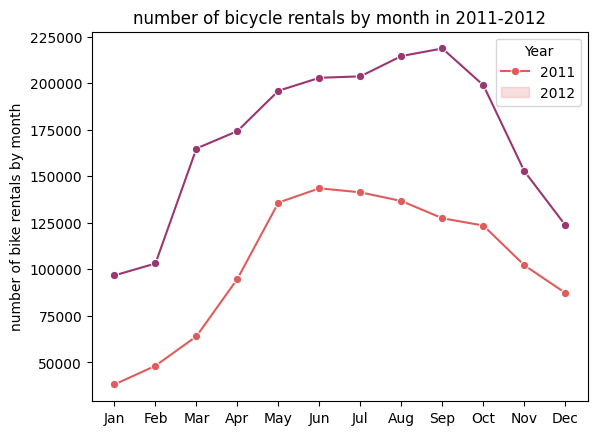

In [28]:
monthly_df = day_df.groupby(by=["month", "year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(data=monthly_df,
             x="month",
             y="count",
             hue="year",
             marker="o",
             palette="flare")

plt.xlabel(None)
plt.ylabel("number of bike rentals by month")
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', "Dec"])

plt.title("number of bicycle rentals by month in 2011-2012")
plt.legend(title="Year", labels=["2011", "2012"])
plt.show()

Dari hasil analisis diatas menggunakan lineplot, kita dapat menyimpulkan bahwa jumlah penyewaan sepeda pada tahun 2012 terjadi peningkatan pada bulan september dan yang paling sedikit penggunaan nya pada bulan januari. sedangkan pada tahun 2011, jumlah penyewaan sepeda mengalami peningkatan pada bulan juni dan paling sedikit terjadi pada bulan januari.

## Pertanyaan 2: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda pada pengguna casual dan registered?

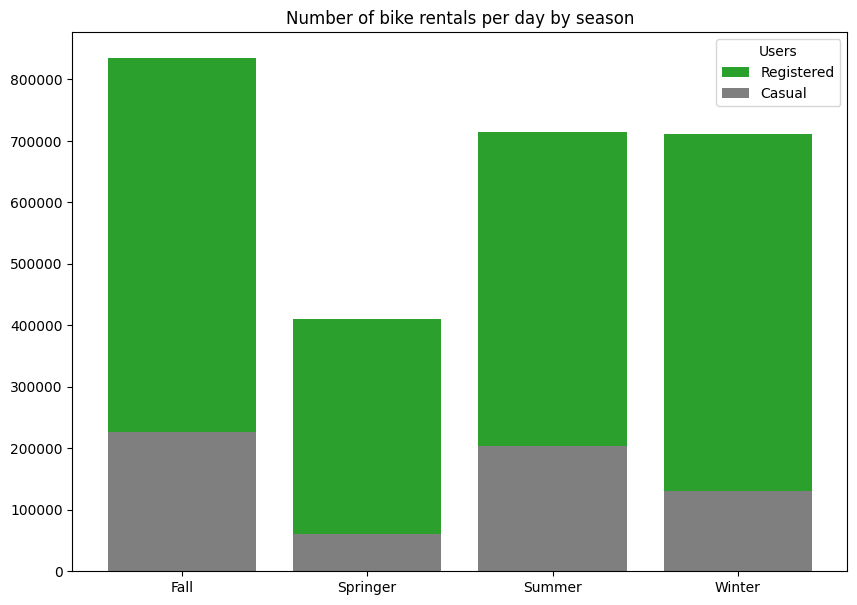

In [29]:
season_df = day_df.groupby("season")[["registered", "casual"]].sum().reset_index()

plt.figure(figsize=(10, 7))

# Membuat
plt.bar(
    season_df["season"],
    season_df["registered"],
    label="Registered",
    color="tab:green"
)

plt.bar(
    season_df["season"],
    season_df["casual"],
    label="Casual",
    color="tab:grey"
)

plt.title("Number of bike rentals per day by season")
plt.legend(title="Users")
plt.show()

Dari hasil analisis diatas menggunakan barplot, kita dapat menyimpulkan bahwa jumlah penyewaan sepeda paling didominasi oleh musim fall untuk setiap pengguna casual dan registered, di susul oleh summer, winter, dan terakhir springer.

## Conclusion

- Kesimpulan dari pertanyaan 1 adalah data menerapkan pola yang cukup signifikan dalam penyewaan sepeda beberapa bulan terakhir. pada bulan juni dan september merupakan puncak penyewaan sepeda selama setahun. Hal ini membuktikan bahwa pada bulan tersebut merupakan musim tropis yang berpengaruh pada peningkatan jumlah penyewaan sepeda.

- Kesimpulan dari pertanyaan 2 adalah faktor cuaca dan hari produktivitas sangat bergantung bagi pengguna penyewaan sepeda. hal ini bisa kita lihat bahwa musim semi(springer) pada pengguna casual dan registered mengalami penyewaan sepeda paling sedikit dibandingkan musim lainnya dan bisa dikatakan mahwa musim gugur(fall) merupakan musim yang paling banyak dimanfaatkan pengguna casual dan registered untuk penyewaan sepeda.

In [36]:
last_date = day_df["dateday"].max()

rfm_data = day_df.groupby(by="instant").agg({
    "dateday": lambda x: (last_date - x.max()).days,
    "count": ["count", "sum"]
}).reset_index()

rfm_data.columns = ["instant", "recency", "frequency", "monetary"]

rfm_data.head()

,instant,recency,frequency,monetary
0,1,730,1,985
1,2,729,1,801
2,3,728,1,1349
3,4,727,1,1562
4,5,726,1,1600


### RFM Analysis

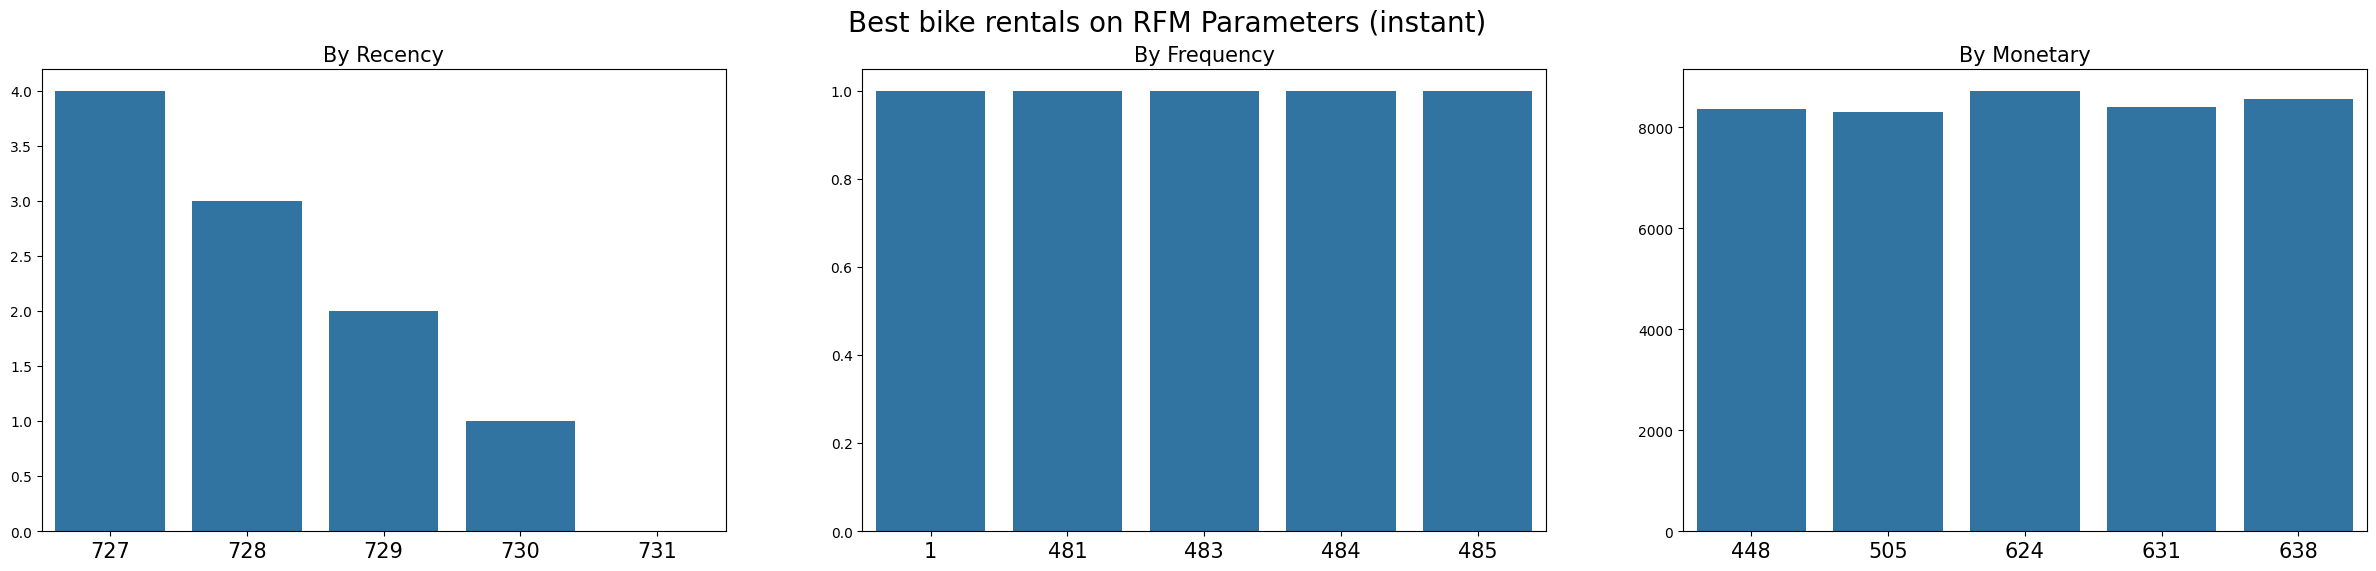

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(y="recency", x="instant", data=rfm_data.sort_values(by="recency", ascending=True).head(5), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency", loc="center", fontsize=15)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="instant", data=rfm_data.sort_values(by="frequency", ascending=False).head(5), ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=15)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="instant", data=rfm_data.sort_values(by="monetary", ascending=False).head(5), ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=15)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best bike rentals on RFM Parameters (instant)", fontsize=20)
plt.show()

Dari hasil RFM analysis diatas, kita bisa menyimpulkan bahwa terdapat beberapa penyewaan sepeda yang sangat banyak dari ketiga parameter diatas.

In [32]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dateday",
    right_on="dateday"
)

all_df.head()

,instant_x,dateday,season_x,year_x,month_x,holiday_x,weekday_x,workingday_x,weather_x,temp_x,...,weekday_y,workingday_y,weather_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,count_y
0,1,2011-01-01,Springer,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,Springer,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,Springer,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,Springer,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,Springer,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [33]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant_x     731 non-null    int64         
 1   dateday       731 non-null    datetime64[ns]
 2   season_x      731 non-null    object        
 3   year_x        731 non-null    int64         
 4   month_x       731 non-null    int64         
 5   holiday_x     731 non-null    int64         
 6   weekday_x     731 non-null    int64         
 7   workingday_x  731 non-null    int64         
 8   weather_x     731 non-null    int64         
 9   temp_x        731 non-null    float64       
 10  atemp_x       731 non-null    float64       
 11  hum_x         731 non-null    float64       
 12  windspeed_x   731 non-null    float64       
 13  casual_x      731 non-null    int64         
 14  registered_x  731 non-null    int64         
 15  count_x       731 non-null    int64     

In [34]:
all_df.to_csv("main_data.csv", index=False)